In [23]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import openseespy.opensees as ops
%matplotlib inline
import openseespy.postprocessing.Get_Rendering as opp


# input parameters for SBSB

In [24]:
Slope_in_degrees=36.0 # Angle made with X-axis (30 to 36 degrees for practical room dimension and story height)
Na=1 #no of storis above upper ground level( upper street level as in paper)
NBXS=2#no of bays in slope(includes bay above upper street level)
NBUSL=0 #No of bays in upper street level(no.of bays after the NBXS-adding more increases the bays right direction(increases head appearance of building))
NBLSL=1 #No of bays in lower street level(no.of bays before slope starts-adding more, increases number in left direction(increases tail appearance of building))
WBUSL=4.0 #Width of bay in upper street level(currently no bay. so this is not used)
WBLSL=3.5 #width of bay in lower street level
WBY=3.0 #Width of bay in across slope direction
NBY=3 #no of bay in across slope direction
TSH= 4.0#Typical story height 

In [25]:
Slope=Slope_in_degrees*np.pi/180 #converting input slope angle to radians
WBXS=round(TSH/np.tan(Slope),2) # width of bays in slope()
TSH=round(WBXS*np.tan(Slope),1) #refined TSH
No_of_setbacks=NBXS#when will this be used???
Top_height=NBXS*TSH+Na*TSH #yo chai korera here paxi matrai clear huncha, pd lai kasari nikalyau sodhna paryo
Total_stories=NBXS+Na #yo ni sodhum kasari nikalyau?

print(WBXS,TSH,Top_height)

5.51 4.0 12.0


# Nodes for all points 

 #Nodes on LSL 

In [26]:
#NBLSL=no. of bays in lower street level
#WBLSL=width of bay in lower street level
#WBY=width of bay in across slope direction
#TSH=Total storey height
#NBY=no. of bays in across slope direction

'''CODE GENERATES NODES ON LOWER STREET LEVEL. IT DOESN'T INCLUDE THE NODES AT THE STARTING OF SLOPE'''

if NBLSL==0: 
        nodesBSL=[] 
else:  
        ##the possible values of x are multiples of bay width in lower street(WBLSL) and and the multiple is no. of bays in lower street
        #(NBLSL) taken from 1 to that number -1 as given by range()
        ##the possible values of y are multiples of bay width in across slope direction(WBY)(note slope hasn't started and the term is just
        # used for understanding) and the multiple is no. of bays in across slope direction(NBY) from 0 to that number given as by range(..)
        '''note the subtle difference between range() and range(+1) in  x and y '''
        ## the possible values of Z varies so because the building might not always have one storey then step back begins
        ## there might be cases where buliding is normal for a number of stories then stepback starts
        ## the last term in the list i think places where node tags will be stored later on
        nodesBSL=[[i*WBLSL,j*WBY,k*TSH,0] for i in range(NBLSL) for j in range(NBY+1) for k in range(Total_stories-No_of_setbacks+1)]

print(nodesBSL)


[[0.0, 0.0, 0.0, 0], [0.0, 0.0, 4.0, 0], [0.0, 3.0, 0.0, 0], [0.0, 3.0, 4.0, 0], [0.0, 6.0, 0.0, 0], [0.0, 6.0, 4.0, 0], [0.0, 9.0, 0.0, 0], [0.0, 9.0, 4.0, 0]]


#Nodes on slope 

In [27]:
#NBXS=no of bays in slope(includes bay in upper street level)
#NBY=no. of bays in across slope direction
#NBLSL= no. of bays in lower street level
#TSH=Total Storey Height
#WBLSL=width of bay in lower street level
#WBXS=width of bay in slope()
#WBY=width of bay in across slope direction

nodes_slope=[]

a=0
b=Total_stories-No_of_setbacks+2  #yo kasari aayo yeso sodhne? 2 chai sab case ma milcha?
   
for i in range(NBXS): #iterate over number of stepbacks
    for j in range(NBY+1): #iterate over all columns in all bays in across slope direciton
        for k in range(a,b): #iterate from a to b that for node positions along a vertical column in slope
                 #the nodes start from the lowest node in the slope
                 nodes_slope.append([NBLSL*WBLSL+WBXS*i,j*WBY,k*TSH,0])
    a=a+1  #these values are increased by one after completing all columns in across slope direction to account for vertical rise of 
    b=b+1  #lowest located column node and increasing height of highest located column node as we move up-slope
print(nodes_slope)                 

[[3.5, 0.0, 0.0, 0], [3.5, 0.0, 4.0, 0], [3.5, 0.0, 8.0, 0], [3.5, 3.0, 0.0, 0], [3.5, 3.0, 4.0, 0], [3.5, 3.0, 8.0, 0], [3.5, 6.0, 0.0, 0], [3.5, 6.0, 4.0, 0], [3.5, 6.0, 8.0, 0], [3.5, 9.0, 0.0, 0], [3.5, 9.0, 4.0, 0], [3.5, 9.0, 8.0, 0], [9.01, 0.0, 4.0, 0], [9.01, 0.0, 8.0, 0], [9.01, 0.0, 12.0, 0], [9.01, 3.0, 4.0, 0], [9.01, 3.0, 8.0, 0], [9.01, 3.0, 12.0, 0], [9.01, 6.0, 4.0, 0], [9.01, 6.0, 8.0, 0], [9.01, 6.0, 12.0, 0], [9.01, 9.0, 4.0, 0], [9.01, 9.0, 8.0, 0], [9.01, 9.0, 12.0, 0]]


nodes above upper street level

In [28]:
#NBUSL=No of bays in upper street level
#NBLSL,WBLSL=no. of bays in lower street level,width of bays in lower street level
#NBXS,WBXS=no. of bays in slope direction,width of bays in slope direction
#WBUSL=width of bays in upper street level
#WBY=width of bays in across slope direction
#TSH=total storey height

if NBUSL==0: #even if its zero, the final upper face of the building nodes have to be produced
        #the x value would be same in this case(so no range()), then we would proceed to calculate along a vertical column then in across slope
        nodes_USL=[[NBLSL*WBLSL+WBXS*NBXS,j*WBY,k*TSH,0] for j in range(NBY+1)for k in range(NBXS,Total_stories+1)]
else:
        nodes_USL=[[NBLSL*WBLSL+WBXS*NBXS+i*WBUSL,j*WBY,k*TSH,0]for i in range(NBUSL+1) for j in range(NBY+1) for k in range(NBXS,Total_stories+1)]

print(nodes_USL)

[[14.52, 0.0, 8.0, 0], [14.52, 0.0, 12.0, 0], [14.52, 3.0, 8.0, 0], [14.52, 3.0, 12.0, 0], [14.52, 6.0, 8.0, 0], [14.52, 6.0, 12.0, 0], [14.52, 9.0, 8.0, 0], [14.52, 9.0, 12.0, 0]]


# All NODES

In [29]:
#combining all nodes that have been produced
NODES_FINAL=nodesBSL+nodes_slope+nodes_USL
print(NODES_FINAL)

[[0.0, 0.0, 0.0, 0], [0.0, 0.0, 4.0, 0], [0.0, 3.0, 0.0, 0], [0.0, 3.0, 4.0, 0], [0.0, 6.0, 0.0, 0], [0.0, 6.0, 4.0, 0], [0.0, 9.0, 0.0, 0], [0.0, 9.0, 4.0, 0], [3.5, 0.0, 0.0, 0], [3.5, 0.0, 4.0, 0], [3.5, 0.0, 8.0, 0], [3.5, 3.0, 0.0, 0], [3.5, 3.0, 4.0, 0], [3.5, 3.0, 8.0, 0], [3.5, 6.0, 0.0, 0], [3.5, 6.0, 4.0, 0], [3.5, 6.0, 8.0, 0], [3.5, 9.0, 0.0, 0], [3.5, 9.0, 4.0, 0], [3.5, 9.0, 8.0, 0], [9.01, 0.0, 4.0, 0], [9.01, 0.0, 8.0, 0], [9.01, 0.0, 12.0, 0], [9.01, 3.0, 4.0, 0], [9.01, 3.0, 8.0, 0], [9.01, 3.0, 12.0, 0], [9.01, 6.0, 4.0, 0], [9.01, 6.0, 8.0, 0], [9.01, 6.0, 12.0, 0], [9.01, 9.0, 4.0, 0], [9.01, 9.0, 8.0, 0], [9.01, 9.0, 12.0, 0], [14.52, 0.0, 8.0, 0], [14.52, 0.0, 12.0, 0], [14.52, 3.0, 8.0, 0], [14.52, 3.0, 12.0, 0], [14.52, 6.0, 8.0, 0], [14.52, 6.0, 12.0, 0], [14.52, 9.0, 8.0, 0], [14.52, 9.0, 12.0, 0]]


# Giving node tag to nodes

In [30]:
#in the nodes produced the 4th element in the array is given node tag values
i=1
for a in NODES_FINAL:
    a[3]=i
    i=i+1
print( NODES_FINAL)
#NODES_FINAL NOW CONTAINS ALL NODES IN THE STEPBACK SETBACK STRUCTURE

[[0.0, 0.0, 0.0, 1], [0.0, 0.0, 4.0, 2], [0.0, 3.0, 0.0, 3], [0.0, 3.0, 4.0, 4], [0.0, 6.0, 0.0, 5], [0.0, 6.0, 4.0, 6], [0.0, 9.0, 0.0, 7], [0.0, 9.0, 4.0, 8], [3.5, 0.0, 0.0, 9], [3.5, 0.0, 4.0, 10], [3.5, 0.0, 8.0, 11], [3.5, 3.0, 0.0, 12], [3.5, 3.0, 4.0, 13], [3.5, 3.0, 8.0, 14], [3.5, 6.0, 0.0, 15], [3.5, 6.0, 4.0, 16], [3.5, 6.0, 8.0, 17], [3.5, 9.0, 0.0, 18], [3.5, 9.0, 4.0, 19], [3.5, 9.0, 8.0, 20], [9.01, 0.0, 4.0, 21], [9.01, 0.0, 8.0, 22], [9.01, 0.0, 12.0, 23], [9.01, 3.0, 4.0, 24], [9.01, 3.0, 8.0, 25], [9.01, 3.0, 12.0, 26], [9.01, 6.0, 4.0, 27], [9.01, 6.0, 8.0, 28], [9.01, 6.0, 12.0, 29], [9.01, 9.0, 4.0, 30], [9.01, 9.0, 8.0, 31], [9.01, 9.0, 12.0, 32], [14.52, 0.0, 8.0, 33], [14.52, 0.0, 12.0, 34], [14.52, 3.0, 8.0, 35], [14.52, 3.0, 12.0, 36], [14.52, 6.0, 8.0, 37], [14.52, 6.0, 12.0, 38], [14.52, 9.0, 8.0, 39], [14.52, 9.0, 12.0, 40]]


# Scatter plot of all nodes

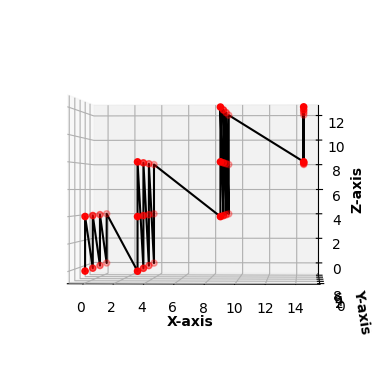

In [31]:
#Visualizing nodes produced
'''IGNORE CONNECTION BETWEEN NODES. THEY DO NOT MEAN ANYTHING'''

x=[]
y=[]
z=[]

for a in NODES_FINAL:
    x.append(a[0])
    y.append(a[1])
    z.append(a[2])

ax = plt.axes(projection ="3d")
ax.scatter3D(x, y, z, color = "red")
ax.plot3D( x,y,z,'black')
ax.view_init(0, -87,0)
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.show()    

   

 


# Element connectivity for columns

In [32]:
#creates a list where each element correponds to pair of node tags between which lies a column element

Connectivity_columns=[]
c=0

for i in range(len(NODES_FINAL)-1):
    if NODES_FINAL[c][0]==NODES_FINAL[c+1][0] and NODES_FINAL[c][1]==NODES_FINAL[c+1][1]:
        #for two nodes whose x and y values each match with each other, there is definately a column between them
        #so record the two node tages in a list as below later to assign a column element between the nodes
        Connectivity_columns.append([NODES_FINAL[c][3],NODES_FINAL[c+1][3]])
    c=c+1

print(Connectivity_columns)

[[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [10, 11], [12, 13], [13, 14], [15, 16], [16, 17], [18, 19], [19, 20], [21, 22], [22, 23], [24, 25], [25, 26], [27, 28], [28, 29], [30, 31], [31, 32], [33, 34], [35, 36], [37, 38], [39, 40]]


# Beams along X connectivity

In [33]:
#creates a list where each element corresponds to pair of node tags between which lies a beam element

Connectivity_beams_X=[]

for i in range(len(NODES_FINAL)): 
    for j in range(len(NODES_FINAL)):
        counter=0

        #if y and z values of two nodes are same, is the last condition to remove redundant cases and duplicates?
        if NODES_FINAL[i][1]==NODES_FINAL[j][1] and NODES_FINAL[i][2]==NODES_FINAL[j][2] and  NODES_FINAL[i][3]<NODES_FINAL[j][3]:
            counter=counter+1
            Connectivity_beams_X.append([NODES_FINAL[i][3],NODES_FINAL[j][3]])
            if counter>0:   #one one is the ith end in only one beam along X direction
                break
    
print(Connectivity_beams_X)    

[[1, 9], [2, 10], [3, 12], [4, 13], [5, 15], [6, 16], [7, 18], [8, 19], [10, 21], [11, 22], [13, 24], [14, 25], [16, 27], [17, 28], [19, 30], [20, 31], [22, 33], [23, 34], [25, 35], [26, 36], [28, 37], [29, 38], [31, 39], [32, 40]]


# Beams along Y connectivity

In [34]:
#Similar logic as in beam along X conncectivity

Connectivity_beams_Y=[]

for i in range(len(NODES_FINAL)):
    for j in range(len(NODES_FINAL)):
        counter=0
        if NODES_FINAL[i][0]==NODES_FINAL[j][0] and NODES_FINAL[i][2]==NODES_FINAL[j][2] and  NODES_FINAL[i][3]<NODES_FINAL[j][3]:
            counter=counter+1
            Connectivity_beams_Y.append([NODES_FINAL[i][3],NODES_FINAL[j][3]])
            if counter>0:
                break
    
print(Connectivity_beams_Y)

[[1, 3], [2, 4], [3, 5], [4, 6], [5, 7], [6, 8], [9, 12], [10, 13], [11, 14], [12, 15], [13, 16], [14, 17], [15, 18], [16, 19], [17, 20], [21, 24], [22, 25], [23, 26], [24, 27], [25, 28], [26, 29], [27, 30], [28, 31], [29, 32], [33, 35], [34, 36], [35, 37], [36, 38], [37, 39], [38, 40]]


# Fixed nodes

In [35]:
#GENERATES NODE TAGS WHICH ARE TO BE ASSIGNED FIXED SUPPORTS

DUMMY=[]
FIXED_NODES=[]

for i in range(len(NODES_FINAL)): #iterates over all column i.e vertical location of nodes along a column

    #this results in nodal locations along a column
    for j in range(len(NODES_FINAL)):
        #for one node, find all nodes that lie in straight vertical line to it
        # and append the node that lies in vertical profile
        #note this contains the starting node also. for example node 1 is compared to node 1
        # and stored then node above node 1 is also stored
        if NODES_FINAL[i][0]==NODES_FINAL[j][0] and NODES_FINAL[i][1]==NODES_FINAL[j][1] :
            FIXED_NODES.append(NODES_FINAL[j]) #not the final result
           
        #for nodes lying on the same vertical profile we only need to fix
        # the one lying at the bottom
    min_z=min(a[2] for a in FIXED_NODES)
    for a in FIXED_NODES:
        if a[2]==min_z:
           DUMMY.append(a[3])  #from the list of nodal locations along same column fix those having lowest Z values
    FIXED_NODES=[] #empty for next iteration along another column nodes.
print(DUMMY)
for a in DUMMY:
   if a not in FIXED_NODES: #here FIXED_NODES is empty so essentially this for loop deletes duplicates from dummy
       FIXED_NODES.append(a) 
print(FIXED_NODES)

[1, 1, 3, 3, 5, 5, 7, 7, 9, 9, 9, 12, 12, 12, 15, 15, 15, 18, 18, 18, 21, 21, 21, 24, 24, 24, 27, 27, 27, 30, 30, 30, 33, 33, 35, 35, 37, 37, 39, 39]
[1, 3, 5, 7, 9, 12, 15, 18, 21, 24, 27, 30, 33, 35, 37, 39]


# Removing beams on ground from beams X and beams Y

In [36]:
#REMOVES COLUMNS AT THE BASE OF LOWER STREET LEVEL AND UPPER STREET LEVEL
#Connecitivity_beams_X is a list of elements containing node pairs(list) between which a beam lies

#iterate over beams along x direction
for beams in Connectivity_beams_X: 
     #check if nodes between which beam element lies are also fixed
     #if yes, this cannot happen hence remove those beams.
     if beams[0] in FIXED_NODES or beams[1] in FIXED_NODES:
         Connectivity_beams_X.remove(beams)

print(Connectivity_beams_X)

#same logic
for beams in Connectivity_beams_Y:
     if beams[0] in FIXED_NODES or beams[1] in FIXED_NODES:
         Connectivity_beams_Y.remove(beams)

print(Connectivity_beams_Y)

[[2, 10], [4, 13], [6, 16], [8, 19], [11, 22], [14, 25], [17, 28], [20, 31], [23, 34], [26, 36], [29, 38], [32, 40]]
[[2, 4], [4, 6], [6, 8], [10, 13], [11, 14], [13, 16], [14, 17], [16, 19], [17, 20], [22, 25], [23, 26], [25, 28], [26, 29], [28, 31], [29, 32], [34, 36], [36, 38], [38, 40]]


# START OF OPENSEES

In [37]:
'''CREATING NODES, BEAM ELEMENTS AND COLUMN ELEMENTS AND PLOTTING FOR CHECKING'''

ops.wipe()
ops.model("basic",'-ndm',3,'-ndf',6)

#DEFINE NODES
for single_node in NODES_FINAL:
    ops.node(single_node[3],*single_node[:3])

#FIX those FIX_NODES
f=[1]*6
for node_to_fix in FIXED_NODES:
    ops.fix(node_to_fix,*f)

# Define Materials

# Materials ID

In [38]:
#setting id of materials
C_concrete=1
unconfined_concrete=2
Rebar_steel=3

# Parameters required for defining Concrete and Steel 

In [39]:
#parameters for models

fc1=-25000    #unconfined
fc2=-28000    #confined
epsc=-0.002   #strain at maximum stress in compression
fu1= 0.2*fc1  #ultimate for unconfined
fu2= 0.2*fc2  #ultimate for confined
epsu=-0.02    #strain at ultimate stress in comparison
lamba=0.1     #ratio between reloading stiffness and initial stiffness in compression
ft1=-0.1*fc1  #maximum stress in tension for unconfined concrete
ft2=-0.1*fc2  #maximum stress in tension for confined concrete
et1=ft1/0.002 #Elastic modulus in tension for unconfined concrete 
et2=ft2/0.002 #Elastic modulus in tension for confined concrete

# E in compression is calculated automatically depending on other material properties

fy=420000     #for reinforcing steel
Es=210000000; #E for reinforcing steel
b=0.005;      #strain hardening ratio
R0=20;        #smoothness of the elastic-to-plastic transition
cR1=0.925;    #smoothness of the elastic-to-plastic transition	
cR2=0.15;     #smoothness of the elastic-to-plastic transition 

# Define Concrete and Steel material in opensees 

In [40]:
#define concrete material
#uniaxialMaterial('Concrete02', matTag, fpc, epsc0, fpcu, epsU, lambda, ft, Ets)
ops.uniaxialMaterial("Concrete02",C_concrete,fc1,epsc,fu1,epsu,lamba,ft1,et1)
ops.uniaxialMaterial("Concrete02",unconfined_concrete,fc2,epsc,fu2,epsu,lamba,ft2,et2)

#define steel
#uniaxialMaterial('Steel02', matTag, Fy, E0, b, *params, a1=a2*Fy/E0, a2=1.0, a3=a4*Fy/E0, a4=1.0, sigInit=0.0)
ops.uniaxialMaterial("Steel02",Rebar_steel,fy,Es,b,R0,cR1,cR2)

# Define beam , column sections

# Parameters for defining beam and column sections (dimensions,cover,rebar area)

In [41]:

#define sections tags
c300x400=1
b300x600=2

#Define dimensions                   
pi= np.pi          
Rebar_25=pi*0.025*0.025/4;  #area rebar 25mm
b_col=0.3; #column base
h_col=0.4; #column height
r_col=0.04; #column cover
b_beam=0.3; #beam base      
h_beam=0.6; #beam height
r_beam=0.04; #beam cover

# Function that creates fiber sections

In [42]:
def fibercreator(secID,Hsec,Bsec,
                 Confined_concrete,unconfined_concrete,Rebar_steel,
                 ch,cb,
                 ntop,areatop,nbot,areabot,ninterTotal,areainter,
                 nfcorey,nfcorez,nfcovy,nfcovz):
    
    coverY=Hsec/2.0
    coverZ=Bsec/2.0
    coreY=coverY-ch
    coreZ=coverZ-cb
    numBarsInt=int(ninterTotal/2)  #no. of intermediate bars per side 

    #    define fiber sections
    ops.section("Fiber",secID,'-GJ',1000000000)
    
    #    define the core
    ops.patch("quad",Confined_concrete,nfcorey,nfcorez,-coreY,coreZ,-coreY,-coreZ,coreY,-coreZ,coreY,coreZ)

    #    define the four cover patches
    ops.patch("quad",unconfined_concrete,2,nfcovy,-coverY,coverZ,-coreY,-coreZ,coreY,coreZ,coverY,coverZ)
    ops.patch("quad",unconfined_concrete,2,nfcovy,-coreY,-coreZ,-coverY,-coverZ,coverY,-coverZ,coreY,-coreZ)
    ops.patch("quad",unconfined_concrete,nfcovz,2,-coverY,coverZ,-coverY,-coverZ,-coreY,-coreZ,-coreY,coreZ)
    ops.patch("quad",unconfined_concrete,nfcovz,2,coreY,coreZ,coreY,-coreZ,coverY,-coverZ,coverY,coverZ)

    #    define reinforcing layers
    ops.layer("straight",Rebar_steel,numBarsInt,areainter,-coreY,coreZ,coreY,coreZ)
    ops.layer("straight",Rebar_steel,numBarsInt,areainter,-coreY,-coreZ,coreY,-coreZ)
    ops.layer("straight",Rebar_steel,ntop,areatop,coreY,coreZ,coreY,-coreZ)
    ops.layer("straight",Rebar_steel,nbot,areabot,-coreY,coreZ,-coreY,-coreZ)

# Create beam and column fiber sections by calling the function

In [43]:
#BuildRCrectSection	$ColSecTag   $HSec   $BSec   $coverH  $coverB  $IDconcCore $IDconcCover $IDSteel $numBarsTop $barAreaTop $numBarsBot $barAreaBot $numBarsIntTot $barAreaInt $nfCoreY  $nfCoreZ  $nfCoverY  $nfCoverZ
fibercreator(c300x400,h_col,b_col,
             C_concrete,unconfined_concrete,Rebar_steel,
             r_col,r_col,
             3,Rebar_25,4,Rebar_25,4,Rebar_25,
             8,8,8,8)
 
fibercreator(b300x600,h_beam,b_beam,
             C_concrete,unconfined_concrete,Rebar_steel,
             r_beam,r_beam,
             3,Rebar_25,4,Rebar_25,4,Rebar_25,
             8,8,8,8)

No Model_ODB specified, trying to get data from the active model.
3D model


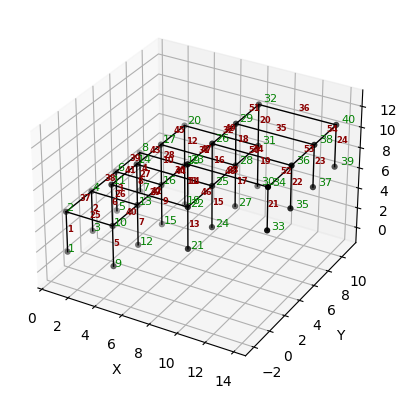

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>)

In [44]:


 








#define transformation tag
PDtranscol=1
LtransbeamX=2
LtransbeamY=3

NI=8 #number of integration points

#Definition of transformation
ops.geomTransf('PDelta',PDtranscol,0,-1,0)
ops.geomTransf('Linear',LtransbeamX,0,1,0)
ops.geomTransf('Linear',LtransbeamY,1,0,0)

##define columns
i=1  #this will be assigned as element tag
for column_ij_node in Connectivity_columns:
 ops.element('nonlinearBeamColumn',i,*column_ij_node,NI,c300x400,PDtranscol) #type Inode Jnode integrationPoints sectag transformation
 i+=1

for beam_ij_node_x in Connectivity_beams_X:
 ops.element('nonlinearBeamColumn',i,*beam_ij_node_x,NI,b300x600,LtransbeamX)
 i+=1

for beam_ij_node_y in Connectivity_beams_Y:
 ops.element('nonlinearBeamColumn',i,*beam_ij_node_y,NI,b300x600,LtransbeamY)
 i+=1

opp.createODB("3Dd_frame",'trial')
opp.plot_model('nodes','elements','3D_frame') #plots nodes,elements in 3
